In [1]:
# stretch Jupyter coding blocks to fit screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>")) 
# if 100% it would fit the screen

In [2]:
! pip install lxml html5lib beautifulsoup4


# PART-1

# Tools and libraries

In [3]:
import requests # The requests library is an 
# HTTP library for getting and posting content etc.

import bs4 as bs # BeautifulSoup4 is a Python library 
# for pulling data out of HTML and XML code.
# We can query markup languages for specific content

import pandas as pd
import re

# Extracting the website

In [4]:
url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"

data = pd.read_html(url) # downloading the website 


In [5]:
covid_data = data[9] # Total cases, deaths, and death rates by country 


In [6]:
covid_data

,Country,Country.1,Deathsper million,Deaths,Cases,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,World[a],688,5422092,284530653,NaN,NaN,NaN
1,NaN,Peru,6070,202524,2279299,NaN,NaN,NaN
2,NaN,Bulgaria,4468,30819,740682,NaN,NaN,NaN
3,NaN,Bosnia and Herzegovina,4105,13397,289676,NaN,NaN,NaN
4,NaN,Hungary,4049,39009,1249694,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
213,NaN,"Saint Helena, Ascension and Tristan da Cunha",—,—,4,NaN,NaN,NaN
214,NaN,Macau,—,—,78,NaN,NaN,NaN
215,NaN,Kiribati,—,—,2,NaN,NaN,NaN
216,NaN,Tonga,—,—,1,NaN,NaN,NaN


In [7]:
covid_data = covid_data[['Country.1', 'Deathsper million', 'Deaths', 'Cases']]

In [8]:
covid_data

,Country.1,Deathsper million,Deaths,Cases
0,World[a],688,5422092,284530653
1,Peru,6070,202524,2279299
2,Bulgaria,4468,30819,740682
3,Bosnia and Herzegovina,4105,13397,289676
4,Hungary,4049,39009,1249694
...,...,...,...,...
213,"Saint Helena, Ascension and Tristan da Cunha",—,—,4
214,Macau,—,—,78
215,Kiribati,—,—,2
216,Tonga,—,—,1


# Use string formatting to remove the square bracket information from region names (e.g. World[a], European Union[b] should be World, European Union).


In [9]:
# removing the squares from Country column
new_col = []
for i in covid_data['Country.1']:
    new_col.append(re.sub('\[.*?\]', '', i)) 
covid_data.insert(loc=0, column='COUNTRY', value=pd.Series(new_col))

# Drop any row that does not contain country or region information. I.e. drop all the rows that do not contain numerical data.


In [10]:
covid_data = covid_data[covid_data.Deaths.apply(lambda x: x.isnumeric())]

In [11]:
covid_data = covid_data[covid_data.Cases.apply(lambda x: x.isnumeric())]

In [12]:
covid_data = covid_data[covid_data['Deathsper million'].apply(lambda x: x.isnumeric())]


In [13]:
#covid_data = covid_data.drop(covid_data.tail(1).index,inplace=False)

In [14]:
covid_data

,COUNTRY,Country.1,Deathsper million,Deaths,Cases
0,World,World[a],688,5422092,284530653
1,Peru,Peru,6070,202524,2279299
2,Bulgaria,Bulgaria,4468,30819,740682
3,Bosnia and Herzegovina,Bosnia and Herzegovina,4105,13397,289676
4,Hungary,Hungary,4049,39009,1249694
...,...,...,...,...,...
199,New Zealand,New Zealand,9,51,14057
200,Bhutan,Bhutan,3,3,2660
201,China,China[c],3,4636,101890
202,Vanuatu,Vanuatu,3,1,7


# Convertig the datatype of all DataFrame values from objects to integers.


In [15]:
covid_data.Deaths = pd.to_numeric(covid_data.Deaths, downcast='integer')
covid_data['Deathsper million'] = pd.to_numeric(covid_data['Deathsper million'], downcast='integer')
covid_data.Cases = pd.to_numeric(covid_data.Cases, downcast='integer')

In [16]:
covid_data.dtypes

COUNTRY              object
Country.1            object
Deathsper million     int16
Deaths                int32
Cases                 int32
dtype: object

In [17]:
covid_data = covid_data.drop(['Country.1'], axis=1)

In [18]:
covid_data.columns = ['country','deaths_per_million','deaths','cases']

In [19]:
covid_data

,country,deaths_per_million,deaths,cases
0,World,688,5422092,284530653
1,Peru,6070,202524,2279299
2,Bulgaria,4468,30819,740682
3,Bosnia and Herzegovina,4105,13397,289676
4,Hungary,4049,39009,1249694
...,...,...,...,...
199,New Zealand,9,51,14057
200,Bhutan,3,3,2660
201,China,3,4636,101890
202,Vanuatu,3,1,7


# Create a new column called recovered_per_deaths and assign it the value number of recovered divided by deaths.


In [20]:
covid_data['cases_per_deaths'] = covid_data['cases'] // covid_data['deaths']

# Country as index of the resulting dataframe

In [21]:
covid_data = covid_data.set_index('country')

In [22]:
covid_data = covid_data.sort_values('cases_per_deaths',ascending=False)

# Final print

In [23]:
covid_data.head(20)

,deaths_per_million,deaths,cases,cases_per_deaths
country,,,,
Greenland,17,1,2437,2437
Bhutan,3,3,2660,886
Cayman Islands,165,11,8386,762
Burundi,3,38,27366,720
Iceland,107,37,25314,684
Faroe Islands,265,13,5548,426
Qatar,210,616,249245,404
Maldives,481,262,95420,364
United Arab Emirates,216,2160,757145,350


# COMMENT

Countries which has high value of recovered_per_deaths may indicates a few things like they have small population and less number of deaths and low value of recovered_per_deaths may indicates the opossite. 

However, this is not the right way to hypothesis or extrapolate on the given information. we might required to do some normalization as there are some samples that are outliers in it.  

# PART-2

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (20, 7)
import datetime 
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
import matplotlib.dates as mdates
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


# Reading the data

In [25]:
covid_deaths_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [26]:
# Converting to Pandas datetime object
covid_deaths_data['date'] = pd.to_datetime(covid_deaths_data['date'])

In [27]:
# Filling NaN values with 0
covid_deaths_data = covid_deaths_data.fillna(0)

In [28]:
covid_deaths_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150852,ZWE,Africa,Zimbabwe,2021-12-25,203746.0,1010.0,2025.571,4885.0,14.0,15.143,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
150853,ZWE,Africa,Zimbabwe,2021-12-26,204351.0,605.0,1811.143,4891.0,6.0,15.571,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
150854,ZWE,Africa,Zimbabwe,2021-12-27,205449.0,1098.0,1481.429,4908.0,17.0,14.714,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
150855,ZWE,Africa,Zimbabwe,2021-12-28,207548.0,2099.0,1397.143,4940.0,32.0,17.286,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


In [29]:
covid_deaths_data = covid_deaths_data.groupby(['date']).sum('total_deaths')

In [30]:
covid_deaths_data

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000000e+00,0.000,0.000,0.000,...,27.900,49.100,87.847,7.980,228.46,2.401,0.0,0.00,0.00,0.000000
2020-01-02,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000000e+00,0.000,0.000,0.000,...,27.900,49.100,87.847,7.980,228.46,2.401,0.0,0.00,0.00,0.000000
2020-01-03,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000000e+00,0.000,0.000,0.000,...,27.900,49.100,87.847,7.980,228.46,2.401,0.0,0.00,0.00,0.000000
2020-01-04,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000000e+00,0.000,0.000,0.000,...,29.800,87.900,178.517,10.080,305.61,3.178,0.0,0.00,0.00,0.000000
2020-01-05,0.000000e+00,0.0,0.000,0.0,0.0,0.000,0.000000e+00,0.000,0.000,0.000,...,29.800,87.900,178.517,10.080,305.61,3.178,97.7,12.29,12.29,7.509071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-25,1.171230e+09,2330249.0,3267345.716,22481198.0,17730.0,28074.719,1.427776e+07,37634.150,50200.530,212917.742,...,1543.134,4735.035,4775.729,510.183,15799.97,136.560,0.0,0.00,0.00,0.000000
2021-12-26,1.173227e+09,1996343.0,3260119.432,22495425.0,14227.0,27573.575,1.430085e+07,23097.082,49790.456,213099.476,...,1543.134,4735.035,4775.729,510.183,15799.97,136.560,0.0,0.00,0.00,0.000000
2021-12-27,1.179602e+09,6375465.0,3709598.282,22523510.0,28085.0,27399.151,1.438961e+07,88756.494,54339.388,213436.173,...,1543.134,4735.035,4775.729,510.183,15799.97,136.560,0.0,0.00,0.00,0.000000


# Use Matplotlib or Pandas to plot the total number of deaths over time globally from the 1st of Jan 2020 until the 23rd of Dec 2021,

In [31]:
covid_deaths_data.drop(covid_deaths_data.tail(6).index,inplace=True) # drop last n rows

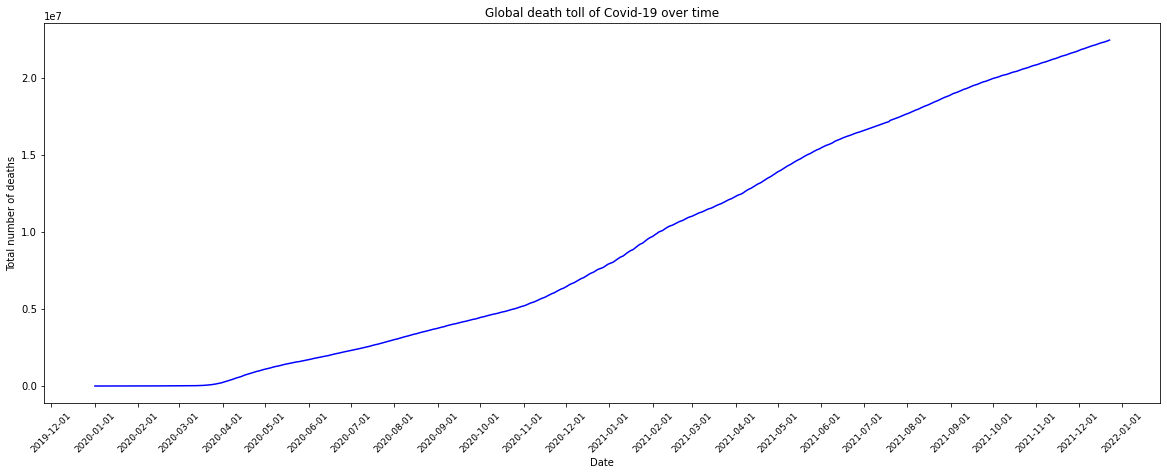

In [32]:
covid_deaths_data.index = pd.date_range(start='1/1/2020', end='23/12/2021')

x_axis = covid_deaths_data.index
y_axis = covid_deaths_data['total_deaths']

fig, ax = plt.subplots()
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Total number of deaths')

# giving a title to my graph
plt.title('Global death toll of Covid-19 over time')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth= None,interval=1, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.plot(x_axis,y_axis,color='blue')
plt.xticks(rotation=45, size=9)

plt.show()


# Use scikit-learn to train a Simple Linear Regression model predicting the number of global coronavirus deaths over the time period of when the first death occurred until the 23rd of Dec 2021

In [33]:
X = np.array(covid_deaths_data.index.to_julian_date()).reshape(covid_deaths_data.shape[0],1)
y = np.array(covid_deaths_data['total_deaths']).reshape(-1,1)

In [34]:
''' Fitting the model '''
regr = LinearRegression()
  
regr.fit(X, y)

LinearRegression()

In [35]:
''' Predicting the values'''
y_pred = regr.predict(X)


In [36]:
xx_axis = covid_deaths_data.index
yy_axis = y_pred

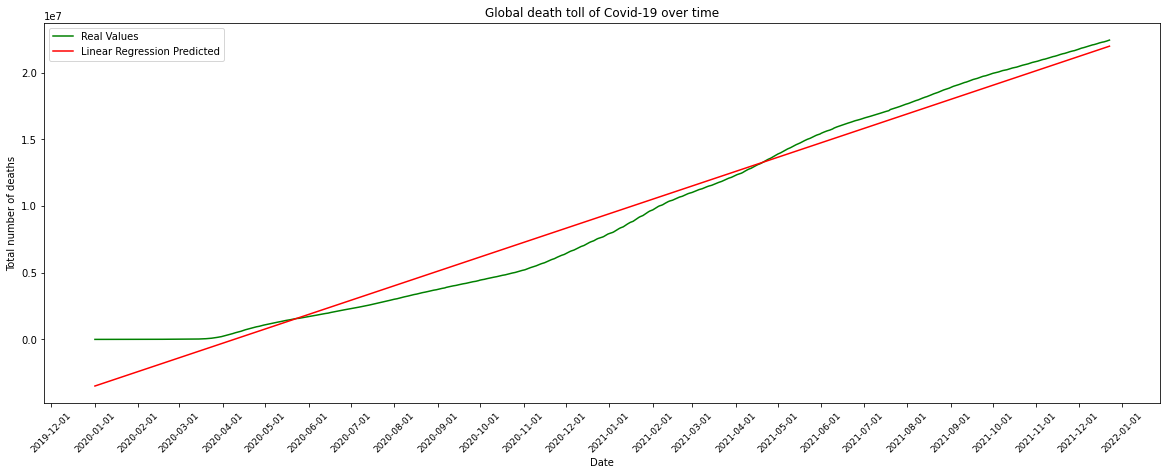

In [37]:
''' Plotting the Graphs of REAL versus Predicted Values'''
fig, ax = plt.subplots()
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Total number of deaths')

# giving a title to my graph
plt.title('Global death toll of Covid-19 over time')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth= None,interval=1, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.plot(x_axis,y_axis,color='green')
ax.plot(xx_axis, yy_axis, color='red')
plt.xticks(rotation=45, size=9)
plt.legend(["Real Values", "Linear Regression Predicted"], loc ="upper left")

plt.show()

# Print the mean squared error of your Linear Regression model (as compared to the real values in the model training data for the whole time period).


In [38]:
#y_pred = regr.predict(X_test)
print('MSE:', mean_squared_error  (y_pred,X))


MSE: 100250846745254.47


# Train any Regression model of your choice on the number of COVID19 deaths in South Korea. 


In [39]:
korea_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [40]:
# Filling NaN values with 0
korea_data = korea_data.fillna(0)

In [41]:
korea_data = korea_data[korea_data['iso_code'] == 'KOR']


In [42]:
korea_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
126449,KOR,Asia,South Korea,2020-01-21,0.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
126450,KOR,Asia,South Korea,2020-01-22,1.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
126451,KOR,Asia,South Korea,2020-01-23,1.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
126452,KOR,Asia,South Korea,2020-01-24,2.0,1.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
126453,KOR,Asia,South Korea,2020-01-25,2.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127153,KOR,Asia,South Korea,2021-12-25,607463.0,5418.0,6052.143,5245.0,69.0,74.714,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
127154,KOR,Asia,South Korea,2021-12-26,611670.0,4207.0,5893.714,5300.0,55.0,74.857,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
127155,KOR,Asia,South Korea,2021-12-27,615532.0,3862.0,5702.429,5346.0,46.0,74.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
127156,KOR,Asia,South Korea,2021-12-28,620938.0,5406.0,5410.429,5382.0,36.0,68.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0


In [43]:
# Training dataset
korea_data_train = korea_data[korea_data['date'] >= '2021-09-01']

In [44]:
korea_data_train = korea_data_train[korea_data_train['date'] <= '2021-11-22']

In [45]:
korea_data_train = korea_data_train.drop(['iso_code','continent','location'], axis=1)

In [46]:
korea_data_train = korea_data_train.groupby(['date']).sum('total_deaths')

In [47]:
# Testing dataset
korea_data_test = korea_data[korea_data['date'] >= '2021-11-23']

In [48]:
korea_data_test = korea_data_test[korea_data_test['date'] <= '2021-11-29']

In [49]:
korea_data_test = korea_data_test.drop(['iso_code','continent','location'], axis=1)

In [50]:
korea_data_test = korea_data_test.groupby(['date']).sum('total_deaths')

In [51]:
korea_data_test

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2021-11-23,425065.0,4115.0,3184.286,3363.0,35.0,29.286,8285.030,80.206,62.066,65.549,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
2021-11-24,429002.0,3937.0,3276.714,3401.0,38.0,30.571,8361.767,76.737,63.867,66.290,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
2021-11-25,432901.0,3899.0,3400.286,3440.0,39.0,32.143,8437.763,75.996,66.276,67.050,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
2021-11-26,436968.0,4067.0,3522.429,3492.0,52.0,35.429,8517.034,79.271,68.656,68.063,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
2021-11-27,440896.0,3928.0,3638.714,3548.0,56.0,39.143,8593.596,76.561,70.923,69.155,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
2021-11-28,444200.0,3304.0,3706.857,3580.0,32.0,40.286,8657.994,64.399,72.251,69.779,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0
2021-11-29,447230.0,3030.0,3754.286,3624.0,44.0,42.286,8717.053,59.058,73.176,70.636,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.0,0.0,0.0


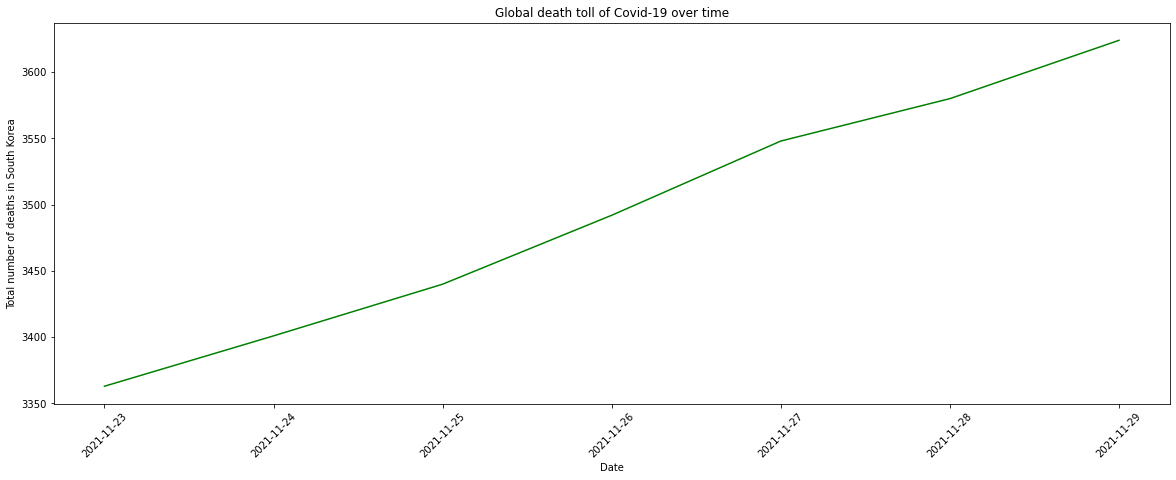

In [52]:
korea_data_test.index = pd.date_range(start='23/11/2021', end='29/11/2021')

x_axis = korea_data_test.index
y_axis = korea_data_test['total_deaths']

fig, ax = plt.subplots()
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Total number of deaths in South Korea')

# giving a title to my graph
plt.title('Global death toll of Covid-19 over time')

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None,interval=1, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.plot(x_axis,y_axis,color='green')
plt.xticks(rotation=45, size=10)

plt.show()

# Creating the model

In [53]:
y_train = np.array(korea_data_train['total_deaths']).reshape(-1,1)
X_train = np.array(korea_data_train.drop(['total_deaths'], axis=1))

y_test = np.array(korea_data_test['total_deaths']).reshape(-1,1)
X_test = np.array(korea_data_test.drop(['total_deaths'], axis=1))

In [54]:
X_train

array([[255401.   ,   1956.   ,   1726.286, ...,      0.   ,      0.   ,
             0.   ],
       [257110.   ,   1709.   ,   1707.429, ...,      0.   ,      0.   ,
             0.   ],
       [258913.   ,   1803.   ,   1708.857, ...,      0.   ,      0.   ,
             0.   ],
       ...,
       [415425.   ,   3114.   ,   2852.143, ...,      0.   ,      0.   ,
             0.   ],
       [418252.   ,   2827.   ,   2969.429, ...,      0.   ,      0.   ,
             0.   ],
       [420950.   ,   2698.   ,   3051.286, ...,      0.   ,      0.   ,
             0.   ]])

In [55]:
y_test

array([[3363.],
       [3401.],
       [3440.],
       [3492.],
       [3548.],
       [3580.],
       [3624.]])

In [56]:
# LINEAR MODEL 
lm=linear_model.Ridge(alpha=0.3)


In [57]:
# Fitting the model
lm.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09354e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.3)

In [58]:
# Prediction
y_pred = lm.predict(X_test)

In [59]:
# Predicted values
y_pred

array([[3360.16845664],
       [3397.03699601],
       [3437.11948568],
       [3488.78584689],
       [3540.33877683],
       [3569.94058089],
       [3611.88845891]])

In [60]:
# Graph's axis
xx_axis = korea_data_test.index
yy_axis = y_pred

# Final Plot

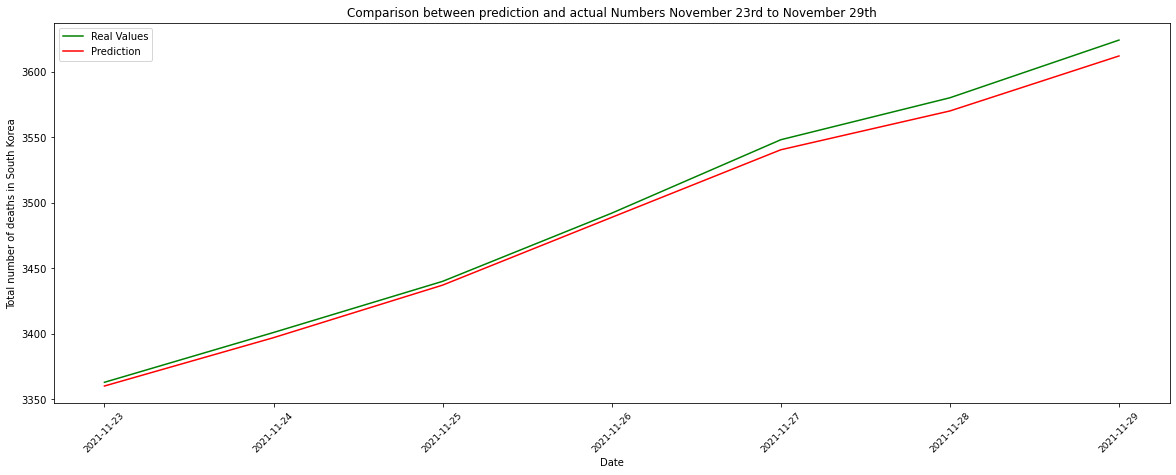

In [61]:
''' Plotting the Graphs of REAL versus Predicted Values'''
fig, ax = plt.subplots()
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Total number of deaths in South Korea')

# giving a title to my graph
plt.title('Comparison between prediction and actual Numbers November 23rd to November 29th')

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None,interval=1, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.plot(x_axis,y_axis,color='green')
ax.plot(xx_axis, yy_axis, color='red')
plt.xticks(rotation=45, size=9)
plt.legend(["Real Values", "Prediction"], loc ="upper left")

plt.show()

# MSE

In [62]:
#y_pred = regr.predict(X_test)
print('MSE:', mean_squared_error  (y_test,y_pred))



MSE: 49.84669460744557
